In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')
df.head()
df['num_labels'] = df['labels'].map({'NEG': 0, 'NEU': 1, 'POS': 2})

In [3]:
df.head()

,sn,text,user_location,labels,score,num_labels
0,0,Rejected sports for the 2020 Olympics include ...,New Jersey,NEG,0.798451,0
1,1,Why is the Team USA men basketball team playin...,"Lynwood, CA",NEG,0.980415,0
2,2,@my_hive_away I'm watching kayaking on the Oly...,NaN,POS,0.985244,2
3,3,While girls her age are still trying to figuri...,United States,NEU,0.967262,1
4,4,@omensfromeden patty mills is at the Olympics???,hozier.tamino.florence.etc.,NEU,0.971178,1


In [4]:
df = df[['text', 'num_labels', 'score']]
df

,text,num_labels,score
0,Rejected sports for the 2020 Olympics include ...,0,0.798451
1,Why is the Team USA men basketball team playin...,0,0.980415
2,@my_hive_away I'm watching kayaking on the Oly...,2,0.985244
3,While girls her age are still trying to figuri...,1,0.967262
4,@omensfromeden patty mills is at the Olympics???,1,0.971178
...,...,...,...
126995,Moroccan heavyweight boxer Youness Baalla atte...,2,0.992508
126996,it's so cool like whenever some shit went down...,1,0.912993
126997,"She built a big lead right from the start, the...",2,0.986000
126998,@SandiVeronik @Svizzer8764 @BrittAbelsen @Didi...,1,0.771630


In [5]:
df.to_csv('data_small.csv', index=False)

In [4]:
sent_count = df['num_labels'].value_counts()
print(sent_count.index, sent_count.values)

Int64Index([1, 2, 0], dtype='int64') [54234 46865 25901]


127000


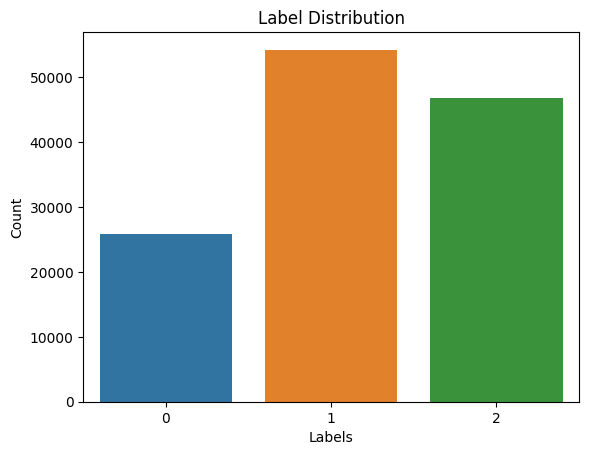

In [5]:
def plot_distribution(sent_count, title='Sentiments'):
    print(sum(sent_count.values))
    sns.barplot(x = sent_count.index, y=sent_count.values)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Label Distribution')
    plt.show()

plot_distribution(sent_count)

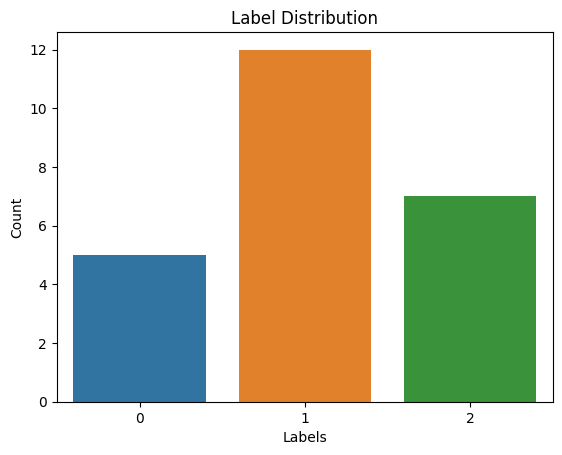

In [56]:
# from fuzzywuzzy import fuzz

target_word = "nepal"

# df_filtered_fuzz = df[df['text'].apply(lambda x: fuzz.partial_ratio(x, target_word)) > 70]
df_filtered = df[df['text'].str.contains(target_word, case=False)]

# sentiment_count_fuzz = df_filtered_fuzz['num_labels'].value_counts()
sentiment_count = df_filtered['num_labels'].value_counts()

# plot_distribution(sentiment_count_fuzz)
plot_distribution(sentiment_count, title='nepal')

In [60]:
def print_tweets(df_filtered, num_tweets=20):
    for i, text in enumerate(df_filtered.head(num_tweets)['text']):
        print(i, ' ', text)
print_tweets(df_filtered)


0   @OnlinePalEng Don't #IStandWithIsrael 
#Israel Ethnic Cleansing #Palestinians
🇵🇸🇵🇸🇵🇸
#Palestine #Gaza #WestBank… https://t.co/SKpZidzO4I
1   School in Nepal have only 1 sports class per week. And we expect 100 of medals in Olympics.
2   @OnlinePalEng A shame, no matter what a fine gesture it is, these athletes have spent years working for the chance… https://t.co/yMmJQbkGUF
3   If olympics has the #kuraKatne 
Competition 

Nepali aunties will have the gold medal for sure 😄
4   School in Nepal have only 1 sports class per week and we expect Gold Medal in Olympics...
#Olympics #Sport
5   @OnlinePalEng Israel vs Broom
Israel vs Balloons
Israel vs Flag
Israel vs Tent
Don't #IStandWithIsrael 
🇵🇸🇵🇸🇵🇸… https://t.co/UGAng7BKKs
6   Nepali Players is also participates in Tokyo Olympics 2021. From Nepal, Gaurika Singh and Alexander Shah of Swimmin… https://t.co/cADfjOb5iA
7   Best Wishes #TeamNepal in #Olympics2020 -#TokyoOlympics2020 !

-#DrBishnuHariNepalPeaceFoundation@#Nepal-#Himalayas… h